# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

If the training is too slow on your own computer, use the smaller datasets (*half or *quarter).

Dense networks are not optimal for tabular datasets like the one used here, but here the main goal is to learn deep learning.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 2: Get a graphics card

Skip this part if you run on the CPU (recommended)

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [3]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on. Lets pretend that everyone is using an Nvidia RTX 3090 graphics card.

Question 1: Google the name of the graphics card, how many CUDA cores does it have?

Question 2: How much memory does the graphics card have?

Question 3: What is stored in the GPU memory while training a DNN ?

*Answer* 

* A1 : 10496 CUDA cores.
* A2 : 24 GB
* A3 : The weights and biases for each layers and node.The model parameters, input data, gradient, and all the itermediate results are in Vram. Usually, it is in batches since it is normal that the data cannot fit in limited amount of Vram.

# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. (not recommended, unless you want to learn how to do it)

We will use the function `genfromtxt` to load the data. (not recommended, unless you want to learn how to do it)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.

Remove the first 24 covariates to make the task harder.

In [4]:
from numpy import genfromtxt # Not needed if you load data from numpy arrays
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')


print(X.shape)
# Remove the first 24 covariates (columns)
X = X[:,24:]
print(X.shape)


print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
print(f'The number of examples of class 1 are {np.sum(Y == 1)}')
print(f'The number of examples of class 0 are {np.sum(Y == 0)}')

(764137, 116)
(764137, 92)
The covariates have size (764137, 92).
The labels have size (764137,).
The number of examples of class 1 are 642516
The number of examples of class 0 are 121621


# Part 5: How good is a naive classifier?

Question 4: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

In all classification tasks you should always ask these questions

- How good classification accuracy can a naive classifier obtain? The naive classifier will assume that all examples belong to one class.
- What is random chance classification accuracy if you randomly guess the label of each (test) example? For a balanced dataset and binary classification this is easy (50%), but in many cases it is more complicated and a Monte Carlo simulation may be required to estimate random chance accuracy.

If your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.


### Answer

* A4:  A naive classifier that classifies all examples as class 1 will achieve accuracy of 84%

In [5]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

print(f'There are {np.sum(np.isnan(np.load("Mirai_data.npy")))} NaNs in the data')

# Print the number of NaNs (not a number) in the labels

print(f'There are {np.sum(np.isnan(Y))} NaNs in the labels')

# Print the number of NaNs in the covariates

print(f'There are {np.sum(np.isnan(X))} NaNs in the covariates')

There are 0 NaNs in the data
There are 0 NaNs in the labels
There are 0 NaNs in the covariates


# Part 6: Preprocessing

Lets do some simple preprocessing

In [6]:
# Convert covariates to floats
X = X.astype(float)

# Convert labels to integers
Y = Y.astype(int)

# Remove mean of each covariate (column)
for col in range(0,X.shape[1]):
    avg = np.mean(X[:,col])
    X[:,col] = X[:,col] - avg
    
# Divide each covariate (column) by its standard deviation
for col in range(0,X.shape[1]):
    X[:,col] = X[:,col]/np.std(X[:,col])

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
for col in range(0,X.shape[1]):
    flag = 0
    meAn = round(np.mean(X[:,col])) 
    stdev = round(np.std(X[:,col]))
    if(meAn != 0 and stdev != 1):
        flag = 1
        print(f'For column {col}, the mean is {meAn} and the std deviation is {stdev}')
    if(flag ==0):
        print('Check completed succesfully')
    

Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succesfully
Check completed succ

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [7]:
from sklearn.model_selection import train_test_split

# Your code to split the dataset
Xtrain,Xtemp,Ytrain,Ytemp = train_test_split(X,Y,test_size= 0.3)

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%
print(f'There are {np.sum(Ytrain == 1)} examples of class 1 in Ytrain')
print(f'There are {np.sum(Ytrain == 0)} examples of class 0 in Ytrain')
print(f'There are {np.sum(Ytemp == 1)} examples of class 1 in Ytemp')
print(f'There are {np.sum(Ytemp == 0)} examples of class 0 in Ytemp')


Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
There are 449904 examples of class 1 in Ytrain
There are 84991 examples of class 0 in Ytrain
There are 192612 examples of class 1 in Ytemp
There are 36630 examples of class 0 in Ytemp


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?

In [8]:
from sklearn.model_selection import train_test_split

# Your code
Xval,Xtest,Yval,Ytest = train_test_split(Xtemp,Ytemp,train_size=0.5)

print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

Make sure that the last layer always has a sigmoid activation function (why?).


In [9]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
Xtrain.shape

(534895, 92)

In [207]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD,Adam
from keras.losses import BinaryCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if(optimizer=='sgd'):
        opt = SGD(learning_rate= learning_rate)
    if(optimizer=='adam'):
        opt = Adam(learning_rate = learning_rate)
    # Setup a sequential model
    model = Sequential()
    
    # Add layers to the model, using the input parameters of the build_DNN function
    
    # Add first layer, requires input shape
    model.add(Input(shape = input_shape))
    # Add remaining layers, do not require input shape
    for i in range(n_layers):
        model.add(Dense(n_nodes,activation = act_fun))
        if(use_bn):
            model.add(BatchNormalization())
        if(use_dropout):
            model.add(Dropout(0.5))
        if(use_custom_dropout):
            model.add(myDropout(0.5))
        

           
    
    
    # Add final layer
    model.add(Dense(1,activation = 'sigmoid'))
    
    
    # Compile model
    model.compile(optimizer=opt,loss= 'BinaryCrossentropy',metrics = ['accuracy'])
              
    
    
    return model

In [208]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


Make sure that you are using learning rate 0.1 !

### 2 layers, 20 nodes

In [13]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape[1:]

# Build the model
model1 = build_DNN(input_shape=input_shape,n_layers= 2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs)

Epoch 1/20


2023-04-26 11:14:37.399783: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


54/54 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8284 - val_loss: 0.4035 - val_accuracy: 0.8388
Epoch 2/20
54/54 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8411 - val_loss: 0.3543 - val_accuracy: 0.8388
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.8411 - val_loss: 0.2977 - val_accuracy: 0.8388
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.8419 - val_loss: 0.2516 - val_accuracy: 0.8484
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.8632 - val_loss: 0.2236 - val_accuracy: 0.8702
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.8820 - val_loss: 0.2083 - val_accuracy: 0.8915
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.8980 - val_loss: 0.1994 - val_accuracy: 0.9029
Epoch 8/20
54/54 [=============

In [14]:
# Evaluate the model on the test data
score = model1.evaluate(x = Xtest,y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 219us/step - loss: 0.1705 - accuracy: 0.9077
Test loss: 0.1705
Test accuracy: 0.9077


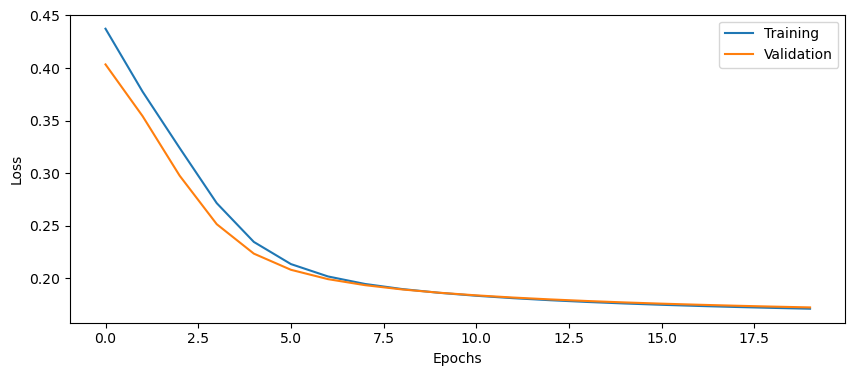

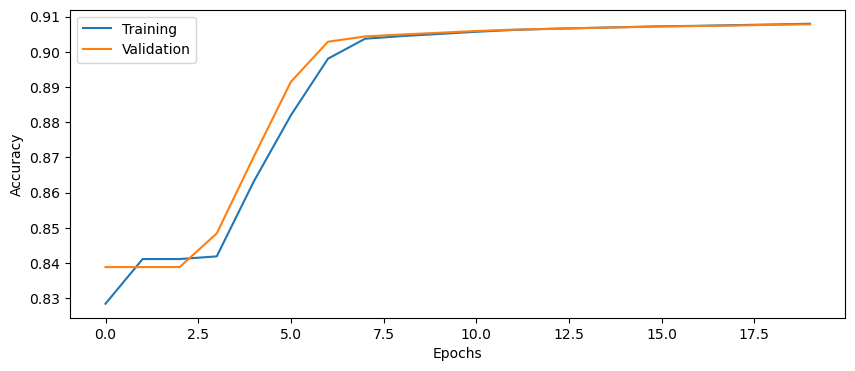

In [15]:
# Plot the history from the training run
plot_results(history1)

# Part 11: More questions

Question 5: What happens if you add several Dense layers without specifying the activation function?

Question 6: How are the weights in each dense layer initialized as default? How are the bias weights initialized?


## Answer 

* The default value for the activation argument is None,meaning that there will be no activation function for that layer, meaning the model will be linear.

* The weights in each dense layers are initialized as default by the kernel_initializaer = 'glorot_uniform'. The bias weights are initialized by default as zeroes per the Documentation of the Dense function.

# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

You need to call the function something like this

class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )

otherwise it will complain

In [231]:
from sklearn.utils import class_weight

# Calculate class weights

class_weights = class_weight.compute_class_weight(classes= np.unique(Ytrain),y = Ytrain,class_weight = 'balanced')

# Print the class weights
print(class_weights)

# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights = {0: class_weights[0],
                 1: class_weights[1]}


[3.14677436 0.59445459]


### 2 layers, 20 nodes, class weights

In [17]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model2 = build_DNN(input_shape=input_shape,n_layers= 2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1)

history2 = model2.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.8753 - val_loss: 0.5466 - val_accuracy: 0.8920
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8854 - val_loss: 0.3836 - val_accuracy: 0.8808
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8802 - val_loss: 0.3042 - val_accuracy: 0.8796
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.8800 - val_loss: 0.2778 - val_accuracy: 0.8798
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.8808 - val_loss: 0.2679 - val_accuracy: 0.8818
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.8841 - val_loss: 0.2615 - val_accuracy: 0.8853
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.8870 - val_loss: 0.2575 - val_accuracy: 0.8882
Epoch 8/20
54/54 [==

In [18]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 239us/step - loss: 0.2340 - accuracy: 0.9019
Test loss: 0.2340
Test accuracy: 0.9019


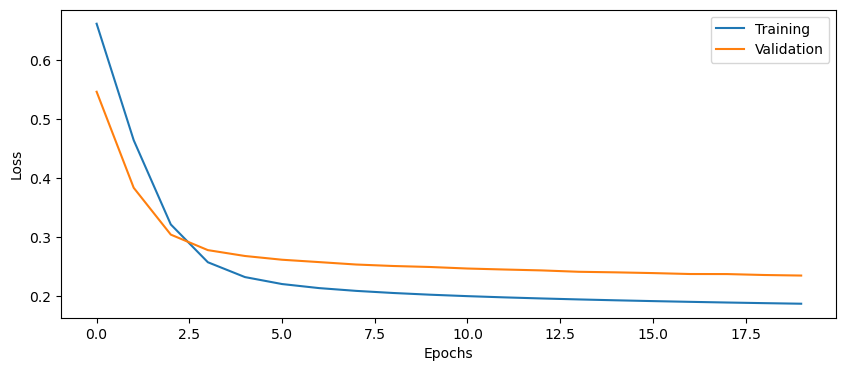

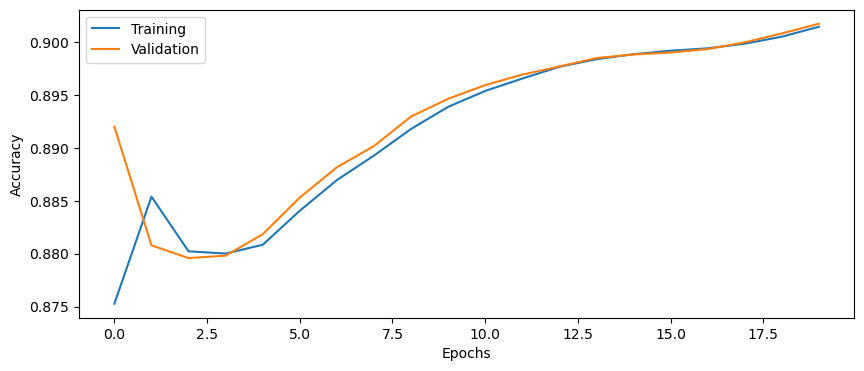

In [19]:
plot_results(history2)

# Part 13: More questions

Skip questions 8 and 9 if you run on the CPU (recommended)

Question 7: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Question 8: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the computer a few times during training.

Question 9: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 10: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Question 11: What limits how large the batch size can be?

Question 12: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

## Answer 

* A7 : We use batch size for stability and managing the speed of the training. It also has an impact on the hardware resources we use for the Neual Networks.Using the entire training samples at once will require a lot of processing power and memory in terms of hardware to complete.By using batches, we update the weights for the NN after every batch,leading to a much more stable and faster training.

* 8 and 9 skipped because of work done on a CPU

* A10 : In each training epoch, if the batch size is 100, the weights are updated 534895/100 times (~5348). If the batch size is 1000, the weights are updated 534 times and if the batch size is 10000, the weights are updated ~54 times.

* A11 : The memory available affects the batch size.i.e., the hardware resources.

* A12 : The learning rate is proportional related to the batch size, if the batch size is decreased, then the learning rate should be decreased to prevent the gradient from taking too large a step relative to the size of the batch. 

# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 13: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                1860      
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


## Answer

* A13: The network with 4 dense layers and 50 nodes each  has 12,351 trainable params, while the model with 2 layers and 20 nodes has 2301 trainable params.

### 4 layers, 20 nodes, class weights

In [21]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model3 = build_DNN(input_shape=input_shape,n_layers= 4,n_nodes=50,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1)


history3 = model3.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)
model3.summary()

Epoch 1/20
54/54 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5611 - val_loss: 0.7018 - val_accuracy: 0.1612
Epoch 2/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5686 - val_loss: 0.6913 - val_accuracy: 0.8720
Epoch 3/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.6424 - val_loss: 0.6896 - val_accuracy: 0.8851
Epoch 4/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.6634 - val_loss: 0.6877 - val_accuracy: 0.8893
Epoch 5/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.6993 - val_loss: 0.6817 - val_accuracy: 0.8545
Epoch 6/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.7512 - val_loss: 0.6887 - val_accuracy: 0.8651
Epoch 7/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.8427 - val_loss: 0.6808 - val_accuracy: 0.8842
Epoch 8/20
54/54 [==

In [22]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 261us/step - loss: 0.2568 - accuracy: 0.8867
Test loss: 0.2568
Test accuracy: 0.8867


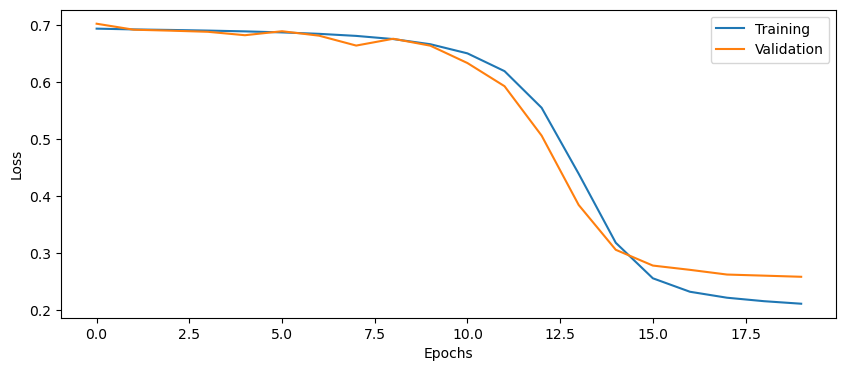

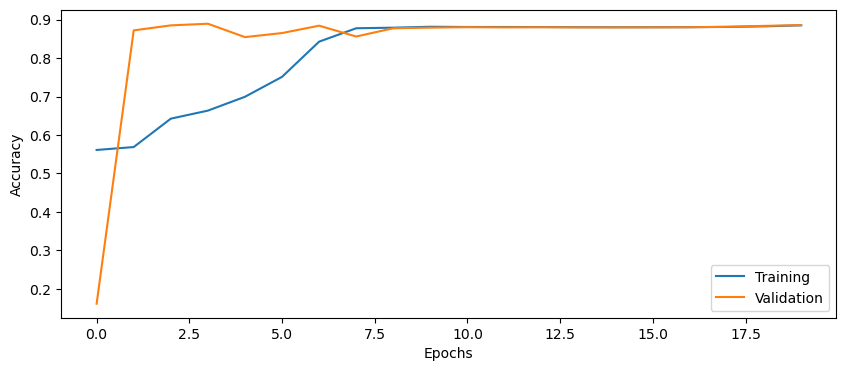

In [23]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [24]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model4 = build_DNN(input_shape,n_layers=2,n_nodes=50,act_fun = 'sigmoid',learning_rate=0.1)

history4 = model4.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 0s 6ms/step - loss: 0.6277 - accuracy: 0.7287 - val_loss: 0.5181 - val_accuracy: 0.8819
Epoch 2/20
54/54 [==============================] - 0s 5ms/step - loss: 0.4005 - accuracy: 0.8823 - val_loss: 0.3396 - val_accuracy: 0.8821
Epoch 3/20
54/54 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.8837 - val_loss: 0.2847 - val_accuracy: 0.8845
Epoch 4/20
54/54 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.8865 - val_loss: 0.2670 - val_accuracy: 0.8884
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 0.8898 - val_loss: 0.2599 - val_accuracy: 0.8908
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.8919 - val_loss: 0.2563 - val_accuracy: 0.8927
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.8938 - val_loss: 0.2545 - val_accuracy: 0.8942
Epoch 8/20
54/54 [==

In [25]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 227us/step - loss: 0.2306 - accuracy: 0.9047
Test loss: 0.2306
Test accuracy: 0.9047


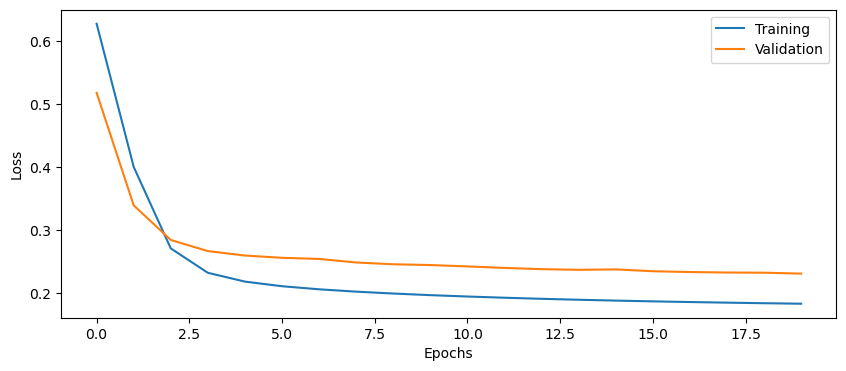

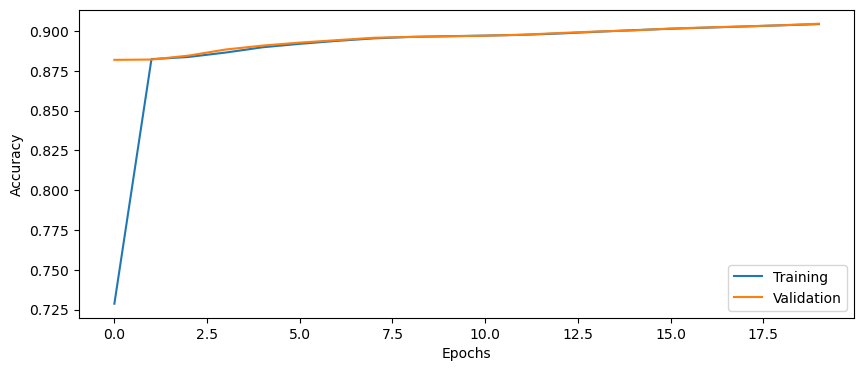

In [26]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [27]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = X.shape[1:]

# Build and train model
model5 = build_DNN(input_shape=input_shape,n_layers=4,n_nodes=50,act_fun='sigmoid',learning_rate=0.1)

history5 = model5.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5449 - val_loss: 0.6860 - val_accuracy: 0.8388
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.6387 - val_loss: 0.6980 - val_accuracy: 0.1612
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.6580 - val_loss: 0.6895 - val_accuracy: 0.8705
Epoch 4/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.7511 - val_loss: 0.6931 - val_accuracy: 0.3818
Epoch 5/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.7509 - val_loss: 0.6868 - val_accuracy: 0.8725
Epoch 6/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.8484 - val_loss: 0.6850 - val_accuracy: 0.8761
Epoch 7/20
54/54 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.8720 - val_loss: 0.6840 - val_accuracy: 0.8733
Epoch 8/20
54/54 [==

In [28]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 254us/step - loss: 0.2586 - accuracy: 0.8841
Test loss: 0.2586
Test accuracy: 0.8841


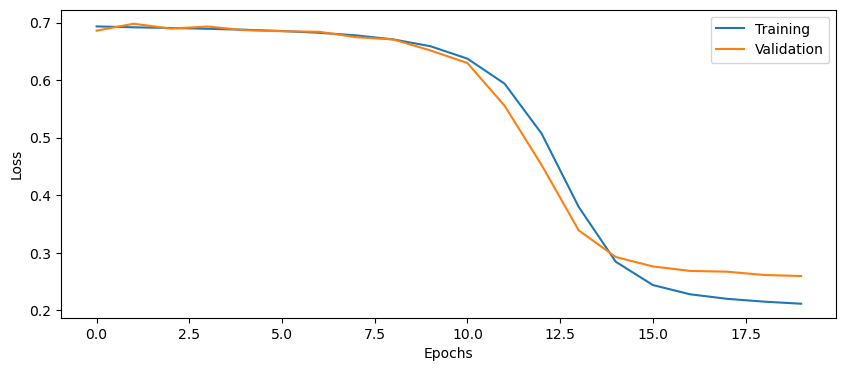

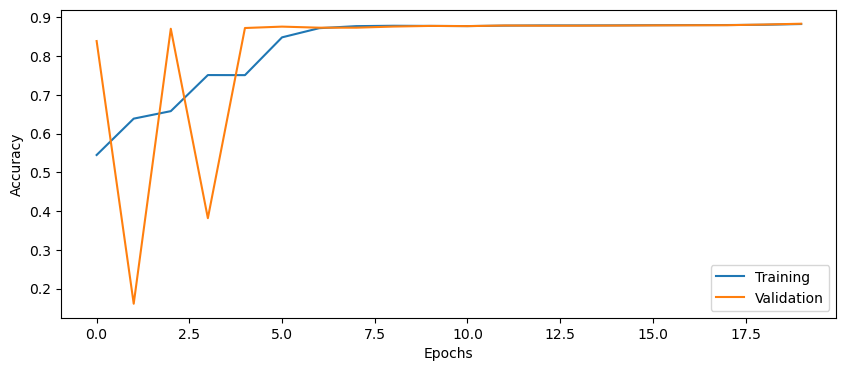

In [29]:
plot_results(history5)

# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 14: Why is batch normalization important when training deep networks?

## Answer
* A14 : Batch normalization is important because it standardizes the inputs for each batch and increases training speed. This especially important in deep networks with large datasets as training times can be very long. 


### 2 layers, 20 nodes, class weights, batch normalization

In [30]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = X.shape[1:]

# Build and train model
model6 = build_DNN(input_shape=input_shape,n_layers= 2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=True)

history6 = model6.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6485 - val_loss: 0.6123 - val_accuracy: 0.8837
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.8829 - val_loss: 0.4497 - val_accuracy: 0.8812
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8809 - val_loss: 0.3294 - val_accuracy: 0.8800
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.8806 - val_loss: 0.2872 - val_accuracy: 0.8803
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.8812 - val_loss: 0.2715 - val_accuracy: 0.8810
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.8822 - val_loss: 0.2640 - val_accuracy: 0.8828
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.8845 - val_loss: 0.2601 - val_accuracy: 0.8855
Epoch 8/20
54/54 [==

In [31]:
# Evaluate model on test data
score = model6.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 227us/step - loss: 0.2333 - accuracy: 0.9025
Test loss: 0.2333
Test accuracy: 0.9025


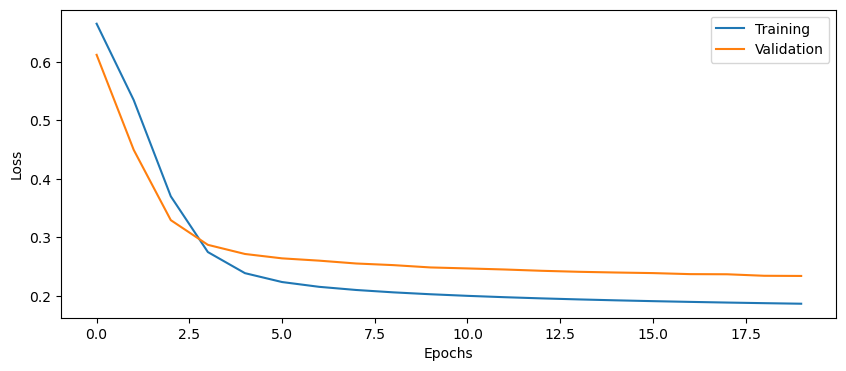

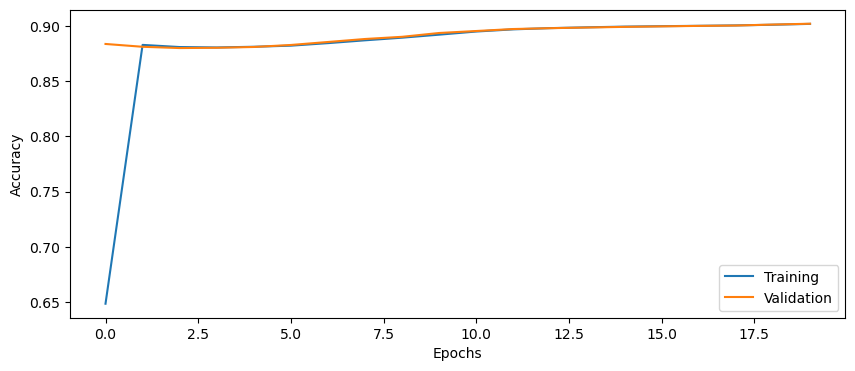

In [32]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [33]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = X.shape[1:]

# Build and train model
model7 = build_DNN(input_shape=input_shape,n_layers= 2,n_nodes=20,act_fun='ReLU',optimizer='sgd',learning_rate=0.1,use_bn=False)

history7 = model7.fit(x = Xtrain,y = Ytrain,batch_size = batch_size,validation_data = (Xval,Yval),epochs = epochs,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8627 - val_loss: 0.2774 - val_accuracy: 0.8855
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.8901 - val_loss: 0.2505 - val_accuracy: 0.8927
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.8949 - val_loss: 0.2414 - val_accuracy: 0.8966
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9003 - val_loss: 0.2350 - val_accuracy: 0.9031
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9044 - val_loss: 0.2297 - val_accuracy: 0.9051
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9064 - val_loss: 0.2260 - val_accuracy: 0.9080
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9088 - val_loss: 0.2247 - val_accuracy: 0.9090
Epoch 8/20
54/54 [==

In [34]:
# Evaluate model on test data
score = model7.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 225us/step - loss: 0.2062 - accuracy: 0.9165
Test loss: 0.2062
Test accuracy: 0.9165


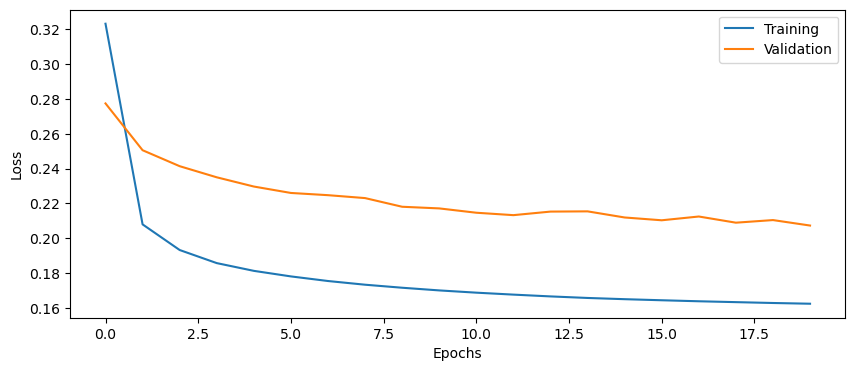

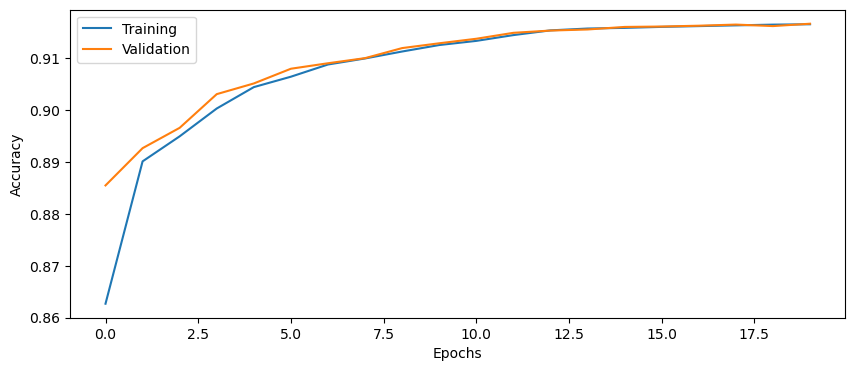

In [35]:
plot_results(history7)

In [36]:
print(f'The test accuracy is {score[1]}')

The test accuracy is 0.9165423512458801


# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [37]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = X.shape[1:]

# Build and train model
model8 = build_DNN(input_shape,n_layers= 2,n_nodes=20,act_fun='ReLU',optimizer='adam',learning_rate=0.1,use_bn=False)

history8 = model8.fit(Xtrain,Ytrain,batch_size = batch_size,epochs = epochs,class_weight = class_weights,validation_data = (Xval,Yval))

Epoch 1/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2342 - accuracy: 0.8930 - val_loss: 0.2332 - val_accuracy: 0.9017
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9059 - val_loss: 0.2511 - val_accuracy: 0.9060
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9115 - val_loss: 0.2023 - val_accuracy: 0.9151
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9163 - val_loss: 0.2067 - val_accuracy: 0.9170
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9175 - val_loss: 0.2033 - val_accuracy: 0.9177
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9190 - val_loss: 0.2177 - val_accuracy: 0.9180
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1531 - accuracy: 0.9196 - val_loss: 0.1771 - val_accuracy: 0.9202
Epoch 8/20
54/54 [==

In [38]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 226us/step - loss: 0.1374 - accuracy: 0.9340
Test loss: 0.1374
Test accuracy: 0.9340


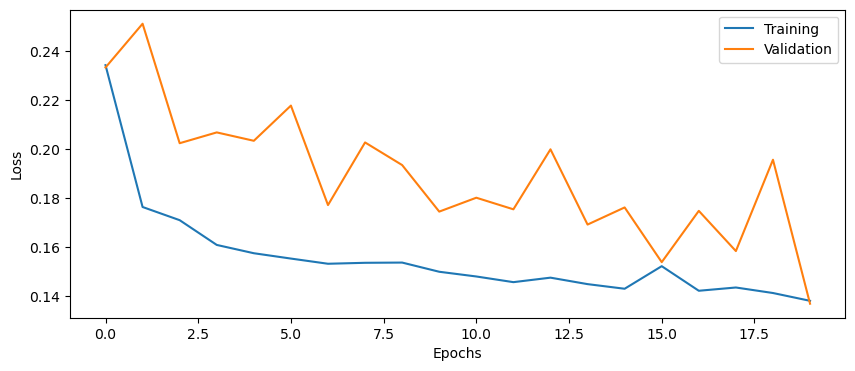

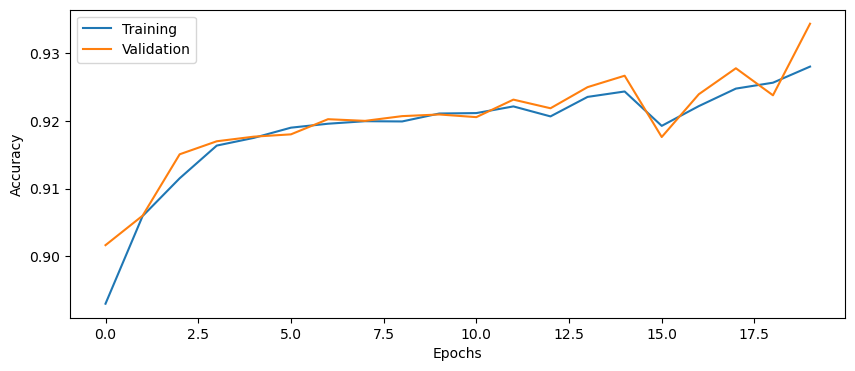

In [39]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. It randomly removes connections to force the neural network to not rely too much on a small number of weights.

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 15: How does the validation accuracy change when adding dropout?

Question 16: How does the test accuracy change when adding dropout?

## Answer 

* A15: Comparing the results below to the results obtained in part 12, we see that the validation accuracy is not discernibly different even while using dropout.
* A16: Similarly, the test accuracy is not affected by the addition of dropout regularization.Given that dropout regularization is a method that may increase accuracy for test and validation data, the lack of such an increase in accuracy while using dropout leads us to conclude that the neural network used is perhaps not deep enough to rely excessively on a certain weights. 

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [41]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = X.shape[1:]

# Build and train model
model9 = build_DNN(input_shape,n_layers= 2,n_nodes=20,act_fun='sigmoid',optimizer='sgd',learning_rate=0.1,use_bn=False,use_dropout=True)

history9 = model9.fit(Xtrain,Ytrain,batch_size = batch_size,epochs = epochs,class_weight = class_weights,validation_data = (Xval,Yval))

Epoch 1/20
54/54 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.8635 - val_loss: 0.6144 - val_accuracy: 0.8780
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.8819 - val_loss: 0.4572 - val_accuracy: 0.8817
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8810 - val_loss: 0.3338 - val_accuracy: 0.8797
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8802 - val_loss: 0.2903 - val_accuracy: 0.8798
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.8805 - val_loss: 0.2764 - val_accuracy: 0.8808
Epoch 6/20
54/54 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.8816 - val_loss: 0.2678 - val_accuracy: 0.8825
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.8840 - val_loss: 0.2634 - val_accuracy: 0.8846
Epoch 8/20
54/54 [==

In [42]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 226us/step - loss: 0.2352 - accuracy: 0.9009
Test loss: 0.2352
Test accuracy: 0.9009


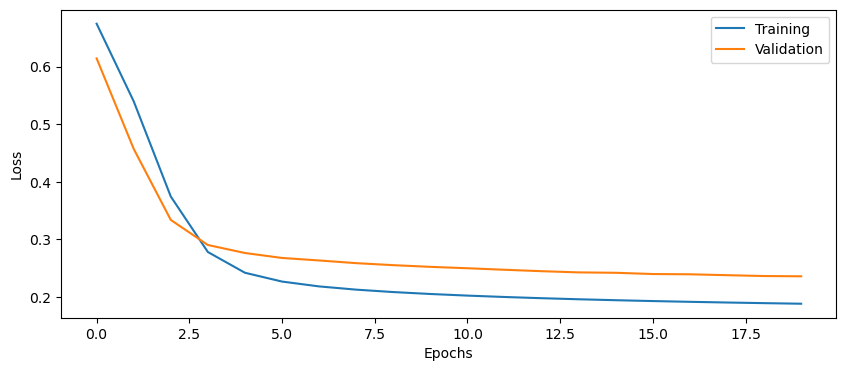

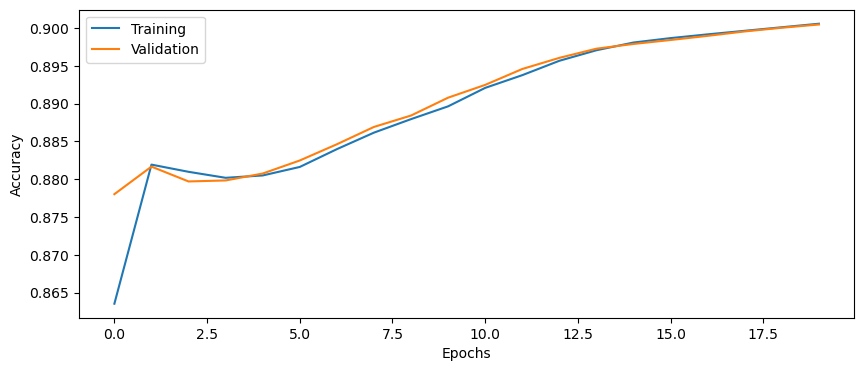

In [43]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 17: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [247]:
# Find your best configuration for the DNN

# Build and train DNN
model10 = build_DNN(input_shape,n_layers=4,n_nodes=60,act_fun='sigmoid',optimizer='adam',learning_rate=0.01,use_bn=True,use_dropout=True,use_custom_dropout=False)

history10 = model10.fit(Xtrain,Ytrain,batch_size = 5000,epochs = 35,class_weight = class_weights,validation_data = (Xval,Yval))


Epoch 1/35
107/107 [==============================] - 2s 12ms/step - loss: 0.2520 - accuracy: 0.8872 - val_loss: 0.4995 - val_accuracy: 0.8388
Epoch 2/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1789 - accuracy: 0.9138 - val_loss: 0.1743 - val_accuracy: 0.9043
Epoch 3/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1752 - accuracy: 0.9143 - val_loss: 0.1790 - val_accuracy: 0.9159
Epoch 4/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1745 - accuracy: 0.9146 - val_loss: 0.2132 - val_accuracy: 0.9165
Epoch 5/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1736 - accuracy: 0.9151 - val_loss: 0.2095 - val_accuracy: 0.9159
Epoch 6/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1720 - accuracy: 0.9154 - val_loss: 0.2314 - val_accuracy: 0.9163
Epoch 7/35
107/107 [==============================] - 1s 13ms/step - loss: 0.1713 - accuracy: 0.9157 - val_loss: 0.2171 - val_accuracy: 0.9164

In [248]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 291us/step - loss: 0.1964 - accuracy: 0.9209
Test loss: 0.1964
Test accuracy: 0.9209


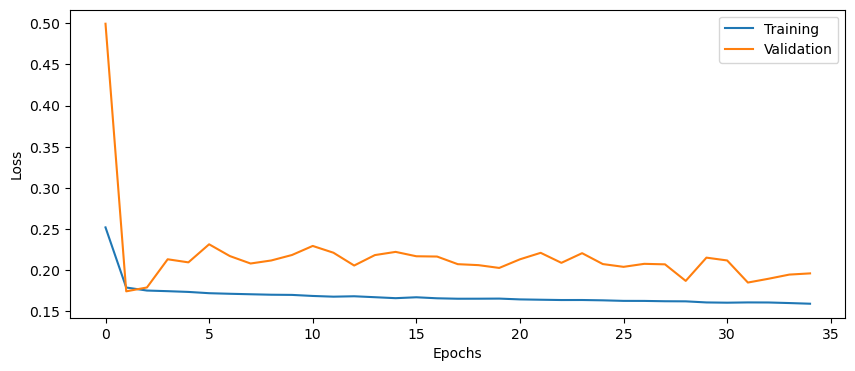

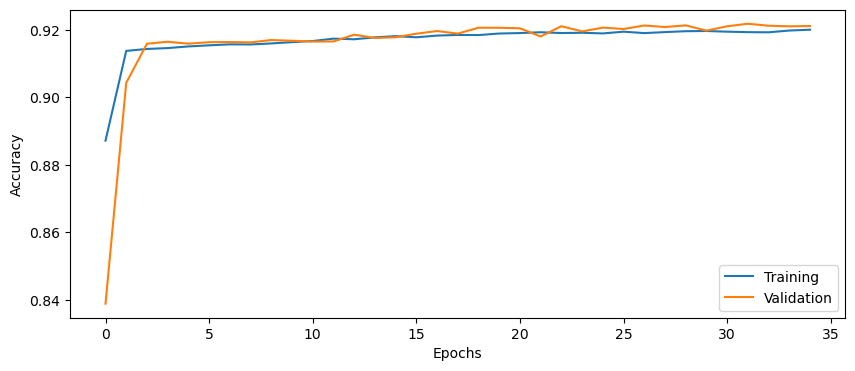

In [249]:
plot_results(history10)

## answer 

* A17: Best configuration 

- batch_size = 5000
- epochs = 35
- n_layers = 4
- n_nodes=60
- act_fun='sigmoid',
- optimizer='adam'
- learning_rate=0.01
- use_bn=True
- use_dropout=True 

- Highest classification for test accuracy is 92.09%

# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 18: What is the mean and the standard deviation of the test accuracy?

In [200]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [250]:
# Your best training parameters
batch_size = 5000
epochs = 35



# Build and train model
model11 = build_DNN(input_shape,n_layers=4,n_nodes=60,act_fun='sigmoid',optimizer='adam',learning_rate=0.01,use_bn=True,use_dropout=True,use_custom_dropout=True)

history11 = model11.fit(Xtrain,Ytrain,batch_size = batch_size,epochs = epochs,class_weight = class_weights,validation_data = (Xval,Yval))

Epoch 1/35
107/107 [==============================] - 3s 18ms/step - loss: 0.3133 - accuracy: 0.8559 - val_loss: 0.2365 - val_accuracy: 0.8388
Epoch 2/35
107/107 [==============================] - 2s 17ms/step - loss: 0.2084 - accuracy: 0.8976 - val_loss: 0.1688 - val_accuracy: 0.9105
Epoch 3/35
107/107 [==============================] - 2s 18ms/step - loss: 0.1922 - accuracy: 0.9080 - val_loss: 0.1861 - val_accuracy: 0.9140
Epoch 4/35
107/107 [==============================] - 2s 19ms/step - loss: 0.1876 - accuracy: 0.9102 - val_loss: 0.2095 - val_accuracy: 0.9127
Epoch 5/35
107/107 [==============================] - 2s 17ms/step - loss: 0.1844 - accuracy: 0.9115 - val_loss: 0.2173 - val_accuracy: 0.9142
Epoch 6/35
107/107 [==============================] - 2s 18ms/step - loss: 0.1813 - accuracy: 0.9124 - val_loss: 0.2149 - val_accuracy: 0.9148
Epoch 7/35
107/107 [==============================] - 2s 17ms/step - loss: 0.1801 - accuracy: 0.9132 - val_loss: 0.2288 - val_accuracy: 0.9134

In [251]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest)
                       
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 1s 340us/step - loss: 0.2234 - accuracy: 0.9152
Test accuracy: 0.9152


In [252]:
# Run the testing 100 times, and save the accuracies in an array

test_results = [] 

for i in range(0,100):
    score = model11.evaluate(Xtest,Ytest)
    test_results.append(score[1])
    
    
# Calculate and print mean and std of accuracies
print(f'Mean accuracy is {np.mean(test_results)}')
print(f'Standard Deviation of accuracy is {np.std(test_results)}')



3582/3582 [==============================] - 1s 340us/step - loss: 0.2235 - accuracy: 0.9152
Mean accuracy is 0.9151729607582092
Standard Deviation of accuracy is 5.403450932067144e-05


## Answer :

* A18 : 
        - Mean accuracy is 91.5172% 
        - Std Dev of accuracy is 0.000054

# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn test_resultsp the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 19: What is the mean and the standard deviation of the test accuracy?

Question 20: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

## answer 

* A19 : - Mean accuracy is 0.9153960585594177 ~91.5%
        - Standard Deviation of accuracy is 0.001176243275679351
* A20 : The main advantage of dropout over CV is that for large network that take a lot of time to train, the drop out method is much faster and less expensive,computationally.


In [253]:
from sklearn.model_selection import StratifiedKFold

cv_accuracy = []

# Define 10-fold cross validation
skf = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)
# Loop over cross validation folds
for i,(train_index, test_index) in enumerate(skf.split(X, Y)):
    x_train_cv,x_test_cv  = X[train_index],X[test_index]
    y_train_cv,y_test_cv = Y[train_index],Y[test_index]
    
    # Calculate class weights for current split
    class_weights = class_weight.compute_class_weight(classes= np.unique(y_train_cv),y = y_train_cv,class_weight = 'balanced')
    class_weights = {0: class_weights[0],
                     1: class_weights[1]}
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    model12 = build_DNN(input_shape,n_layers=4,n_nodes=60,act_fun='sigmoid',optimizer='adam',learning_rate=0.01,use_bn=True,use_dropout=True,use_custom_dropout=True)
    # Fit the model with training set and class weights for this fold
    history12 = model12.fit(x_train_cv,y_train_cv,batch_size = 5000,epochs = 35,class_weight = class_weights)
    # Evaluate the model using the test set for this fold
    score = model12.evaluate(x_test_cv,y_test_cv)
    # Save the test accuracy in an array
    cv_accuracy.append(score[1])

# Calculate and print mean and std of accuracies

print(f'Mean accuracy is {np.mean(cv_accuracy)}')
print(f'Standard Deviation of accuracy is {np.std(cv_accuracy)}')

Epoch 1/35
138/138 [==============================] - 3s 15ms/step - loss: 0.2864 - accuracy: 0.8659
Epoch 2/35
138/138 [==============================] - 2s 17ms/step - loss: 0.1951 - accuracy: 0.9071
Epoch 3/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1874 - accuracy: 0.9107
Epoch 4/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1838 - accuracy: 0.9113
Epoch 5/35
138/138 [==============================] - 2s 17ms/step - loss: 0.1800 - accuracy: 0.9132
Epoch 6/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1791 - accuracy: 0.9128
Epoch 7/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1769 - accuracy: 0.9134
Epoch 8/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1761 - accuracy: 0.9134
Epoch 9/35
138/138 [==============================] - 2s 15ms/step - loss: 0.1750 - accuracy: 0.9139
Epoch 10/35
138/138 [==============================] - 2s 16ms/step - loss: 0.1744 - accura

# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 21: How would you change the DNN used in this lab in order to use it for regression instead?

## Answer 

* A21 : By use a different loss function, one that is suited for regression and replacing the activation fucntion in the output layer with a linear function (or no activation function).

## Report

Send in this jupyter notebook, with answers to all questions.